# Teste T

## Independent Sample T-Test

Estou comparando as médias de dois grupos distintos, para verificar se eles têm ou não têm uma média diferente.

H0 = As médias entre os dois grupos são iguais
H1 = as médias entre os dois grupos são diferentes


Para esse exercício vou criar duas amostras: a primeira possui média de 50 e desvio padrão de 20, a segunda possui média 50 e desvio padrão de 15:

In [1]:
import random

random.seed(20) #colocando uma semente para sempre ter o mesmo resultado!

N = 50 #N dos meus dois grupos

a = [random.gauss(55,20) for x in range(N)] 
b = [random.gauss(50,15) for x in range(N)] 

Agora eu vou plotar um histograma das minhas duas amostras:

Text(0.5, 1.0, 'Independent Sample T-Test')

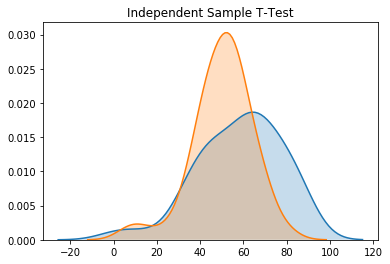

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(a, shade=True)
sns.kdeplot(b, shade=True)

plt.title("Independent Sample T-Test")

Vê-se que os conjuntos das diferentes amostras estão bem próximas uma da outra.

Agora, baseado em H0 e H1 lá em cima, eu vou testar se as médias são ou não iguais usando o T-test:

In [5]:
from scipy import stats

#Função que roda o independent sample T-Test
tStat, pValue = stats.ttest_ind(a, b, equal_var = False)

print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat)) #print the P-Value and the T-Statistic

P-Value:0.017485741540118758 T-Statistic:2.421942924642376


Importante: eu setei os desvios padrão aqui. Se não, teria que fazer o Levene's test para homosquececidade (verificar que as variâncias não nsão iguais ```equal_var``` )

Se eu estabeleci um coeficiente de significância alfa = 0.05 , então eu posso rejeitar a hipótese nula de que as amostras são iguais. Agora, se o meu teste for mais rigoroso com alfa = 0.01, então eu não posso rejeitar a hipótese nula.

## Paired Sample T-Test (teste pareado)

Aqui vamos verificar se as médias de duas amostras da **mesma população** diferem ou não. Exemplo: a taxa de abertura de um mailing que passou por uma repaginação.

In [6]:
random.seed(20) #setando a semente

N = 30 #N das populações

a = [random.gauss(50,15) for x in range(N)] #amostra antes da mudança
b = [random.gauss(60,15) for x in range(N)] #amostra depois da mudança

Hipótese nula:
µd = 0 (a diferença média (d) entre as duas amostras é zero, indicando que a minha mudança não teve efeito)
    
Hipótese alternativa: 
µd ≠ 0 (a diferença média (d) entre as duas amostras é diferente de zero, indicando que a minha intervenção teve algum efeito )

In [7]:
#Paired sample-test:
tStat, pValue =  stats.ttest_rel(a, b)

print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat)) 

P-Value:0.007834002687720413 T-Statistic:-2.856841146891359


Segundo esse teste estatístico, o nosso pvalue < 0.01, então podemos rejeitar a H0 e afirmar que a nossa mudança no mailing gerou impacto na taxa de abertura.

## One-Sample T-Test

Aqui nós estamos testando se a média da amostra é igual a uma média específica.
Vou usar aqui um exemplo do livro "Métodos estatísticos para as ciências sociais" (AGRESTI; FINLAY, 2012). Neste exemplo, uma pesquisa foi realizada entre norte-americanos para descobrir se a população é mais liberal ou mais conservadora. Em uma escala de 1 a 7 os respondentes deveriam afirmar se eram mais liberais (1) ou mais conservadores (7) . 



In [23]:
import numpy as np
import pandas as pd

psg = { 'score': [1,2,3,4,5,6,7], 
       'negro' : [10, 21, 22, 74, 21, 27, 11], 
       'branco' : [36, 109, 124, 421, 179, 176, 28], 
       'outra' : [1, 13, 13, 27, 9, 7, 2]}

resposta =  ['1. Extremamente liberal', '2.Liberal', '3.Um pouco liberal', '4. Nem liberal, nem conservador',
     '5. Um pouco conservador', '6. Conservador', '7. Extremamente conservador']

psg = pd.DataFrame(psg, index = resposta)

In [24]:
psg

,score,negro,branco,outra
1. Extremamente liberal,1,10,36,1
2.Liberal,2,21,109,13
3.Um pouco liberal,3,22,124,13
"4. Nem liberal, nem conservador",4,74,421,27
5. Um pouco conservador,5,21,179,9
6. Conservador,6,27,176,7
7. Extremamente conservador,7,11,28,2


In [59]:
# fazendo a escala:

el = np.repeat(1, 10)
l = np.repeat(1, 21)
pl = np.repeat(3, 22)
nn = np.repeat(4, 74)
pc = np.repeat(5, 21)
c = np.repeat(6, 27)
ec = np.repeat(7, 11)

negros = np.array([el, l, pl, nn, pc, c, ec])
negros = np.concatenate( negros, axis=0 )

#Minha média observada é essa:
negros

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7])

Bom, aqui as minhas hipóteses são:

H0 : µd = 4 , ou seja não existe tendência para ser mais conservador nem mais liberal;
H1 : µd ≠ 4 , ou seja, existe alguma tendência.
    
    

In [71]:
import scipy
from scipy import stats

#ideal
popmean = 4  #hypothesized population mean


#teste:
tStat, pValue =  scipy.stats.ttest_1samp(negros, popmean, axis=0)

print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat)) 

P-Value:0.7617706324448296 T-Statistic:-0.30360419068443184


O meu p-value deu 0.7, o que implica que não podemos rejeitar a H0